# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: Luis Enrique Sanchez Zamora
*   Alumno 2: Edgar A. Valdes A.
*   Alumno 3: Victor Cano Prados



Repositorio: https://github.com/sanieni6/08MIAR-Proyecto-practico


---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [1]:
# Colab / Local detection and Drive path setup
mount = '/content/gdrive'
drive_root = mount + "/My Drive/08_MIAR/actividades/proyecto practico"

try:
    from google.colab import drive
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

print(f"Running in Colab: {IN_COLAB}")

Running in Colab: True


---
### 1.3. Montar carpeta de datos local (solo Colab)

In [2]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

Mounted at /content/gdrive

Colab: making sure  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico  exists.

Colab: Changing directory to  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
/content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
Archivos en el directorio: 
['checkpoints', 'training_curves.png', 'agent_demo.png', 'evaluation_histogram.png']


---
### 1.4. Instalar librerías necesarias

In [3]:
# Install dependencies for the PyTorch DQN implementation
%pip install torch torchvision
%pip install gymnasium[atari]
%pip install gymnasium[accept-rom-license]
%pip install ale-py
%pip install opencv-python
%pip install numpy matplotlib tqdm ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.1 MB/s eta 0:00:0000:0100:01


---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

# Implementación 1: Luis Sanchez

### 1.4. Instalar librerías necesarias (python 3.10.19)

In [4]:
%pip install torch torchvision
%pip install gymnasium[atari]
%pip install gymnasium[accept-rom-license]
%pip install ale-py
%pip install opencv-python
%pip install numpy matplotlib tqdm ipywidgets

In [5]:
import ale_py
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque, namedtuple
import random
import cv2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from datetime import datetime
import os
from IPython.display import clear_output

# Registrar entornos ALE (Atari)
gym.register_envs(ale_py)

# Verificar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [6]:
class Config:
    # Environment
    ENV_ID = "SpaceInvaders-v0"
    
    # Training
    TOTAL_TIMESTEPS = 5_000_000
    LEARNING_RATE = 2.5e-4
    GAMMA = 0.99
    
    # Exploration
    EPSILON_START = 1.0
    EPSILON_END = 0.1
    EPSILON_DECAY_STEPS = 2_000_000
    
    # Replay Buffer
    BUFFER_SIZE = 200_000
    BATCH_SIZE = 32
    
    # Network
    TARGET_UPDATE_FREQ = 2000
    LEARNING_STARTS = 5_000
    TRAIN_FREQ = 4
    
    # Logging & Saving
    LOG_FREQ = 1000
    SAVE_FREQ = 50_000
    CHECKPOINT_DIR = "checkpoints"
    
    # Reproducibility
    SEED = 42

config = Config()

In [7]:
def set_seed(seed):
    """Set random seeds for reproducibility."""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)

set_seed(config.SEED)

## Environment Wrappers

Los wrappers a continuación serviran para preprocesar las observaciones del entorno Atari antes de ser procesadas por la red neuronal. Estos wrappers fueron tomados y adaptados de: https://github.com/openai/baselines/blob/master/baselines/common/atari_wrappers.py
```

In [8]:
class NoopResetEnv(gym.Wrapper):
    """
    Ejecuta un número aleatorio de no-ops (1-30) al inicio de cada episodio.
    Esto agrega estocasticidad a la posición inicial del estado, evitando que el agente memorice posiciones de inicio fijas.
    """
    def __init__(self, env, noop_max=30):
        super().__init__(env)
        self.noop_max = noop_max
        self.noop_action = 0
        assert env.unwrapped.get_action_meanings()[0] == 'NOOP'
    
    def reset(self, **kwargs):
        obs, info = self.env.reset(**kwargs)
        noops = np.random.randint(1, self.noop_max + 1)
        for _ in range(noops):
            obs, _, terminated, truncated, info = self.env.step(self.noop_action)
            if terminated or truncated:
                obs, info = self.env.reset(**kwargs)
        return obs, info

In [9]:
class MaxAndSkipEnv(gym.Wrapper):
    """Repite la acción para 4 frames y devuelve el máximo de los últimos 2 frames."""
    def __init__(self, env, skip=4):
        super().__init__(env)
        self._obs_buffer = np.zeros((2,) + env.observation_space.shape, dtype=np.uint8)
        self._skip = skip
    
    def step(self, action):
        total_reward = 0.0
        terminated = truncated = False
        for i in range(self._skip):
            obs, reward, terminated, truncated, info = self.env.step(action)
            if i == self._skip - 2:
                self._obs_buffer[0] = obs
            if i == self._skip - 1:
                self._obs_buffer[1] = obs
            total_reward += reward
            if terminated or truncated:
                break
        max_frame = self._obs_buffer.max(axis=0)
        return max_frame, total_reward, terminated, truncated, info

In [10]:
class FireResetEnv(gym.Wrapper):
    #Presiona FIRE después de reiniciar el juego.
    def __init__(self, env):
        super().__init__(env)
        assert env.unwrapped.get_action_meanings()[1] == 'FIRE'
        assert len(env.unwrapped.get_action_meanings()) >= 3
    
    def reset(self, **kwargs):
        self.env.reset(**kwargs)
        obs, _, terminated, truncated, info = self.env.step(1)  # FIRE
        if terminated or truncated:
            obs, info = self.env.reset(**kwargs)
        obs, _, terminated, truncated, info = self.env.step(2)  # RIGHT (to start)
        if terminated or truncated:
            obs, info = self.env.reset(**kwargs)
        return obs, info

In [11]:
class WarpFrame(gym.ObservationWrapper):
    """
    Se encarga de convertir la imagen a escala de grises y redimensionarla a 84x84.
    """
    def __init__(self, env, width=84, height=84):
        super().__init__(env)
        self.width = width
        self.height = height
        self.observation_space = gym.spaces.Box(
            low=0, high=255,
            shape=(self.height, self.width),
            dtype=np.uint8
        )
    
    def observation(self, obs):
        frame = cv2.cvtColor(obs, cv2.COLOR_RGB2GRAY)
        frame = cv2.resize(frame, (self.width, self.height), interpolation=cv2.INTER_AREA)
        return frame

In [12]:
class FrameStack(gym.Wrapper):
    """
    Apila los ultimos 4 framse consecutivos en un tensor de 4x84x84 para dar información temporal al agente.
    """
    def __init__(self, env, k=4):
        super().__init__(env)
        self.k = k
        self.frames = deque([], maxlen=k)
        shape = env.observation_space.shape
        self.observation_space = gym.spaces.Box(
            low=0, high=255,
            shape=(k,) + shape,
            dtype=env.observation_space.dtype
        )
    
    def reset(self, **kwargs):
        obs, info = self.env.reset(**kwargs)
        for _ in range(self.k):
            self.frames.append(obs)
        return self._get_obs(), info
    
    def step(self, action):
        obs, reward, terminated, truncated, info = self.env.step(action)
        self.frames.append(obs)
        return self._get_obs(), reward, terminated, truncated, info
    
    def _get_obs(self):
        return np.array(self.frames)

In [13]:
class ClipRewardEnv(gym.RewardWrapper):
    """
    normaliza las recompensas a {-1, 0, +1}.
    """
    def reward(self, reward):
        return np.sign(reward)

In [14]:
class EpisodicLifeEnv(gym.Wrapper):
    """
    Termina el episodio cuando se pierde una vida.
    """
    def __init__(self, env):
        super().__init__(env)
        self.lives = 0
        self.was_real_done = True
    
    def step(self, action):
        obs, reward, terminated, truncated, info = self.env.step(action)
        self.was_real_done = terminated or truncated
        lives = info.get('lives', 0)
        if 0 < lives < self.lives:
            terminated = True
        self.lives = lives
        return obs, reward, terminated, truncated, info
    
    def reset(self, **kwargs):
        if self.was_real_done:
            obs, info = self.env.reset(**kwargs)
        else:
            obs, _, _, _, info = self.env.step(0)  # No-op to continue
        self.lives = info.get('lives', 0)
        return obs, info

In [15]:
def make_env(env_id, seed=None):
    """
    Crea un entorno con todos los wrappers.
    """
    env = gym.make(env_id, frameskip=1)
    if seed is not None:
        env.reset(seed=seed)
    env = NoopResetEnv(env)
    env = MaxAndSkipEnv(env)
    env = EpisodicLifeEnv(env)
    env = FireResetEnv(env)
    env = WarpFrame(env)
    env = ClipRewardEnv(env)
    env = FrameStack(env)
    return env

/usr/local/lib/python3.12/dist-packages/gymnasium/envs/registration.py:512: DeprecationWarning: WARN: The environment SpaceInvaders-v0 is out of date. You should consider upgrading to version `v4`.
  logger.deprecation(


Observation shape: (4, 84, 84)
Observation dtype: uint8
Action space: 6


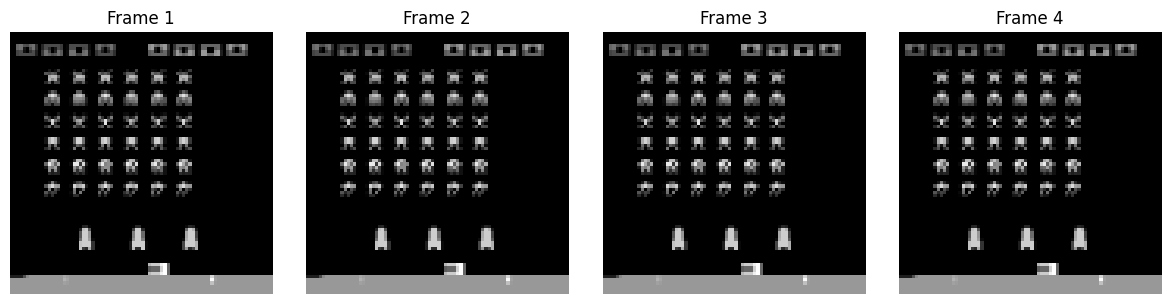

In [16]:
# Test environment
test_env = make_env(config.ENV_ID, seed=config.SEED)
obs, _ = test_env.reset()
print(f"Observation shape: {obs.shape}")
print(f"Observation dtype: {obs.dtype}")
print(f"Action space: {test_env.action_space.n}")

# Display stacked frames
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    axes[i].imshow(obs[i], cmap='gray')
    axes[i].set_title(f'Frame {i+1}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

test_env.close()

## DQN Neural Network

Implementamos la arquitectura convolucional:
- 3 capas convolucionales para extraer características visuales
- 2 capas fully-connected para mapear características a valores Q

In [16]:
class DQN(nn.Module):
    def __init__(self, n_actions):
        super(DQN, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(4, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU()
        )
        
        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(64 * 7 * 7, 512),
            nn.ReLU(),
            nn.Linear(512, n_actions)
        )
        
        # Initialize weights
        self._initialize_weights()
    
    def _initialize_weights(self):

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

In [17]:
# Test network
test_net = DQN(n_actions=6).to(device)
test_input = torch.randn(1, 4, 84, 84).to(device)
test_output = test_net(test_input)
print(f"Input shape: {test_input.shape}")
print(f"Output shape: {test_output.shape}")
print(f"Total parameters: {sum(p.numel() for p in test_net.parameters()):,}")
del test_net, test_input, test_output

Input shape: torch.Size([1, 4, 84, 84])
Output shape: torch.Size([1, 6])
Total parameters: 1,687,206


## Experience Replay Buffer

El buffer de replay almacena transiciones (s, a, r, s', done) para:
- Romper correlaciones temporales entre muestras
- Reutilizar experiencias múltiples veces
- Mejorar la eficiencia de datos

In [18]:
Transition = namedtuple('Transition', ('state', 'action', 'reward', 'next_state', 'done'))

class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    
    def push(self, state, action, reward, next_state, done):
        state = np.array(state, dtype=np.uint8)
        next_state = np.array(next_state, dtype=np.uint8)
        self.buffer.append(Transition(state, action, reward, next_state, done))
    
    def sample(self, batch_size):
        transitions = random.sample(self.buffer, batch_size)
        batch = Transition(*zip(*transitions))
        
        # Convert to float32 and normalize [0,255] -> [0.0,1.0]
        states = np.array(batch.state, dtype=np.float32) / 255.0
        actions = np.array(batch.action)
        rewards = np.array(batch.reward, dtype=np.float32)
        next_states = np.array(batch.next_state, dtype=np.float32) / 255.0
        dones = np.array(batch.done, dtype=np.float32)
        
        return states, actions, rewards, next_states, dones
    
    def __len__(self):
        return len(self.buffer)

In [19]:
# Test buffer
test_buffer = ReplayBuffer(1000)
for i in range(100):
    test_buffer.push(
        np.random.randint(0, 256, (4, 84, 84), dtype=np.uint8),
        np.random.randint(6),
        np.random.rand(),
        np.random.randint(0, 256, (4, 84, 84), dtype=np.uint8),
        bool(np.random.randint(2))
    )

states, actions, rewards, next_states, dones = test_buffer.sample(32)
print(f"States shape: {states.shape}")
print(f"States dtype: {states.dtype}")
print(f"States range: [{states.min():.3f}, {states.max():.3f}]")
print(f"Actions shape: {actions.shape}")
print(f"Buffer size: {len(test_buffer)}")
del test_buffer

States shape: (32, 4, 84, 84)
States dtype: float32
States range: [0.000, 1.000]
Actions shape: (32,)
Buffer size: 100


## DQN Agent

El agente DQN implementa:
- Dos redes: q_network (online) y target_network (objetivo estable)
- Exploración epsilon-greedy con decaimiento lineal
- Entrenamiento con Huber loss y gradient clipping

In [20]:
class DQNAgent:
    def __init__(self, n_actions, config):
        self.n_actions = n_actions
        self.config = config
        
        # Networks
        self.q_network = DQN(n_actions).to(device)
        self.target_network = DQN(n_actions).to(device)
        self.target_network.load_state_dict(self.q_network.state_dict())
        self.target_network.eval()
        
        # Optimizer
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=config.LEARNING_RATE)
        
        # Replay buffer
        self.replay_buffer = ReplayBuffer(config.BUFFER_SIZE)
    
    def get_epsilon(self, step):
        eps_start = self.config.EPSILON_START
        eps_end = self.config.EPSILON_END
        eps_decay = self.config.EPSILON_DECAY_STEPS
        
        if step >= eps_decay:
            return eps_end
        return eps_start - (eps_start - eps_end) * (step / eps_decay)
    
    def select_action(self, state, step):
        epsilon = self.get_epsilon(step)
        
        if random.random() < epsilon:
            return random.randrange(self.n_actions)
        
        with torch.no_grad():
            state_tensor = torch.FloatTensor(np.array(state, dtype=np.float32) / 255.0).unsqueeze(0).to(device)
            q_values = self.q_network(state_tensor)
            return q_values.argmax(dim=1).item()
    
    def update_target_network(self):
        self.target_network.load_state_dict(self.q_network.state_dict())
    
    def train_step(self):
        """Perform one training step.
        
        Returns:
            Loss value for logging, or None if buffer too small
        """
        if len(self.replay_buffer) < self.config.BATCH_SIZE:
            return None
        
        states, actions, rewards, next_states, dones = self.replay_buffer.sample(
            self.config.BATCH_SIZE
        )
        
        states = torch.FloatTensor(states).to(device)
        actions = torch.LongTensor(actions).to(device)
        rewards = torch.FloatTensor(rewards).to(device)
        next_states = torch.FloatTensor(next_states).to(device)
        dones = torch.FloatTensor(dones).to(device)
        
        q_values = self.q_network(states)
        q_values = q_values.gather(1, actions.unsqueeze(1)).squeeze(1)
        
        with torch.no_grad():
            next_q_values = self.target_network(next_states)
            max_next_q_values = next_q_values.max(dim=1)[0]
            targets = rewards + self.config.GAMMA * max_next_q_values * (1 - dones)
        
        loss = F.smooth_l1_loss(q_values, targets)
        
        self.optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.q_network.parameters(), max_norm=10)
        self.optimizer.step()
        
        return loss.item()
    
    def save(self, filepath):
        torch.save({
            'q_network': self.q_network.state_dict(),
            'target_network': self.target_network.state_dict(),
            'optimizer': self.optimizer.state_dict()
        }, filepath)
    
    def load(self, filepath):
        checkpoint = torch.load(filepath, map_location=device)
        self.q_network.load_state_dict(checkpoint['q_network'])
        self.target_network.load_state_dict(checkpoint['target_network'])
        self.optimizer.load_state_dict(checkpoint['optimizer'])

## Training

El bucle de entrenamiento implementa:
- Warmup period: recolectar experiencias antes de entrenar
- Entrenamiento cada TRAIN_FREQ pasos
- Actualización de target network cada TARGET_UPDATE_FREQ pasos
- Guardado de checkpoints y mejor modelo

In [40]:
os.makedirs(config.CHECKPOINT_DIR, exist_ok=True)

In [41]:
## Utilidad creada para visualizar el progreso del entrenamiento
def plot_training_progress(episode_rewards, losses, avg_rewards, save_path=None):
    clear_output(wait=True)
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Episode rewards
    axes[0].plot(episode_rewards, alpha=0.6)
    axes[0].set_title('Episode Rewards')
    axes[0].set_xlabel('Episode')
    axes[0].set_ylabel('Reward')
    
    # Rolling average
    axes[1].plot(avg_rewards)
    axes[1].axhline(y=20, color='r', linestyle='--', label='Target (20)')
    axes[1].set_title('Average Reward (100 episodes)')
    axes[1].set_xlabel('Episode')
    axes[1].set_ylabel('Avg Reward')
    axes[1].legend()
    
    # Loss
    if losses:
        axes[2].plot(losses)
        axes[2].set_title('Training Loss')
        axes[2].set_xlabel('Update Step')
        axes[2].set_ylabel('Loss')
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [42]:
def train(config):
    # Create environment and agent
    env = make_env(config.ENV_ID, seed=config.SEED)
    n_actions = env.action_space.n
    agent = DQNAgent(n_actions, config)
    
    # Tracking variables
    episode_rewards = []
    avg_rewards = []
    losses = []
    best_avg_reward = float('-inf')
    
    # Episode tracking
    state, _ = env.reset()
    episode_reward = 0
    episode_num = 0
    
    print(f"Training DQN on {config.ENV_ID}")
    print(f"Device: {device}")
    print(f"Total timesteps: {config.TOTAL_TIMESTEPS:,}")
    print("-" * 60)
    
    pbar = tqdm(range(config.TOTAL_TIMESTEPS), desc="Training")
    
    for step in pbar:
        # Select and execute action
        action = agent.select_action(state, step)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        
        # Store transition
        agent.replay_buffer.push(state, action, reward, next_state, done)
        
        episode_reward += reward
        state = next_state
        
        # Episode ended
        if done:
            episode_rewards.append(episode_reward)
            episode_num += 1
            
            # Calculate rolling average
            if len(episode_rewards) >= 100:
                avg_reward = np.mean(episode_rewards[-100:])
            else:
                avg_reward = np.mean(episode_rewards)
            avg_rewards.append(avg_reward)
            
            # Check for best model
            if len(episode_rewards) >= 100 and avg_reward > best_avg_reward:
                best_avg_reward = avg_reward
                agent.save(os.path.join(config.CHECKPOINT_DIR, 'best_model.pt'))
                print(f"\n✅ New best model saved! Avg reward: {avg_reward:.1f}")
            
            # Reset episode
            state, _ = env.reset()
            episode_reward = 0
        
        # Training
        if step >= config.LEARNING_STARTS and step % config.TRAIN_FREQ == 0:
            loss = agent.train_step()
            if loss is not None:
                losses.append(loss)
        
        # Update target network
        if step % config.TARGET_UPDATE_FREQ == 0:
            agent.update_target_network()
        
        # Logging
        if step % config.LOG_FREQ == 0 and episode_num > 0:
            epsilon = agent.get_epsilon(step)
            avg = avg_rewards[-1] if avg_rewards else 0
            loss_str = f"{losses[-1]:.4f}" if losses else "N/A"
            pbar.set_postfix({
                'Ep': episode_num,
                'Avg100': f"{avg:.1f}",
                'ε': f"{epsilon:.3f}",
                'Loss': loss_str
            })
        
        # Save checkpoint
        if step > 0 and step % config.SAVE_FREQ == 0:
            agent.save(os.path.join(config.CHECKPOINT_DIR, f'checkpoint_{step}.pt'))
            # Plot progress
            if len(episode_rewards) > 10:
                plot_training_progress(episode_rewards, losses, avg_rewards)
    
    env.close()
    
    # Save final model
    agent.save(os.path.join(config.CHECKPOINT_DIR, 'final_model.pt'))
    
    training_stats = {
        'episode_rewards': episode_rewards,
        'avg_rewards': avg_rewards,
        'losses': losses,
        'best_avg_reward': best_avg_reward
    }
    
    print("\n" + "=" * 60)
    print("TRAINING COMPLETE")
    print(f"Episodes: {episode_num}")
    print(f"Best avg reward (100 eps): {best_avg_reward:.1f}")
    print("=" * 60)
    
    return agent, training_stats

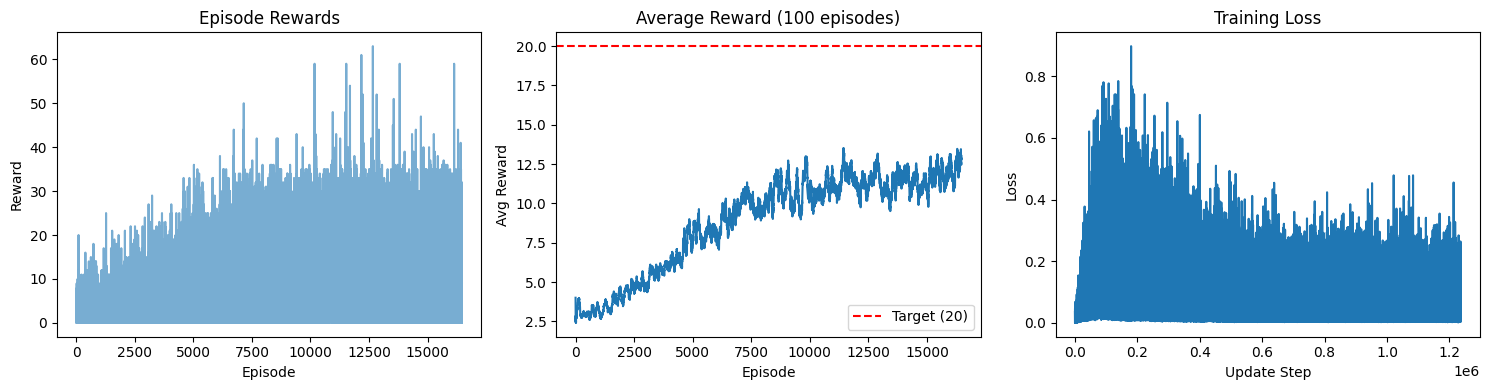


TRAINING COMPLETE
Episodes: 16598
Best avg reward (100 eps): 13.5


In [43]:
# Run training
agent, training_stats = train(config)

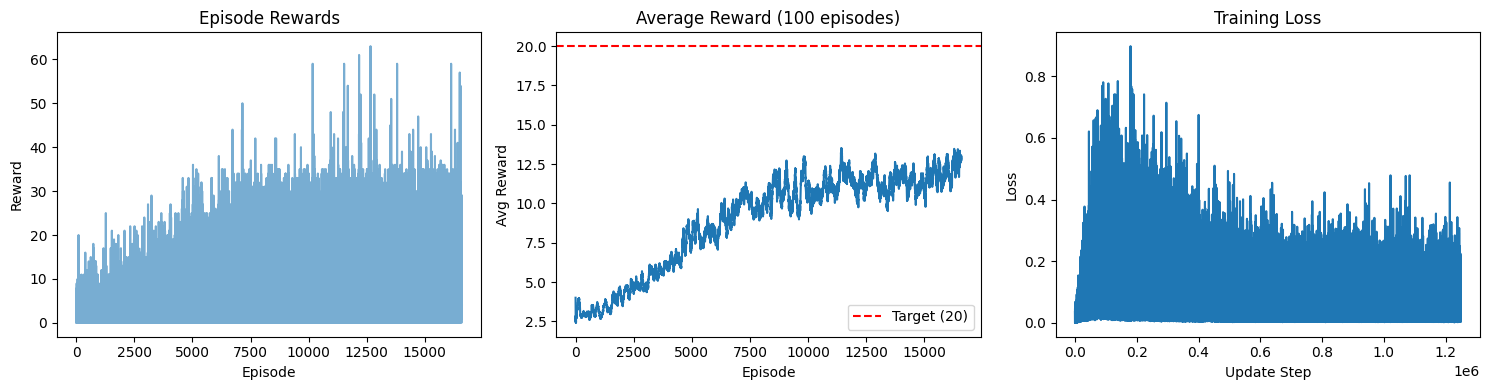

In [44]:
plot_training_progress(
    training_stats['episode_rewards'],
    training_stats['losses'],
    training_stats['avg_rewards'],
    save_path='training_curves.png'
)

## Evaluation

Evaluamos el agente entrenado en 100 episodios completos
(sin EpisodicLifeEnv para obtener recompensas reales del juego completo).

In [ ]:
def make_eval_env(env_id, seed=None, clip_reward=False):
    env = gym.make(env_id, frameskip=1)
    if seed is not None:
        env.reset(seed=seed)
    env = NoopResetEnv(env)
    env = MaxAndSkipEnv(env)
    env = FireResetEnv(env)
    env = WarpFrame(env)
    if clip_reward:
        env = ClipRewardEnv(env)
    env = FrameStack(env)
    return env

def evaluate(agent, num_episodes, clip_reward=False):
    env = make_eval_env(config.ENV_ID, clip_reward=clip_reward)
    rewards = []

    for ep in tqdm(range(num_episodes), desc="Evaluating"):
        state, _ = env.reset()
        episode_reward = 0
        done = False

        while not done:
            # Use low epsilon for evaluation (0.05)
            if random.random() < 0.05:
                action = random.randrange(agent.n_actions)
            else:
                with torch.no_grad():
                    state_tensor = torch.FloatTensor(np.array(state, dtype=np.float32) / 255.0).unsqueeze(0).to(device)
                    q_values = agent.q_network(state_tensor)
                    action = q_values.argmax(dim=1).item()

            state, reward, terminated, truncated, _ = env.step(action)
            episode_reward += reward
            done = terminated or truncated

        rewards.append(episode_reward)

    env.close()
    return rewards


In [22]:
# Reconstruct agent from saved weights (no retraining needed)
test_env = make_eval_env(config.ENV_ID)
n_actions = test_env.action_space.n
test_env.close()

agent = DQNAgent(n_actions, config)

best_model_path = os.path.join(config.CHECKPOINT_DIR, 'best_model.pt')
if os.path.exists(best_model_path):
    agent.load(best_model_path)
    print(f"✅ Loaded best model from {best_model_path}")
else:
    print(f"❌ Checkpoint not found at {best_model_path}")
    print("Available files:", os.listdir(config.CHECKPOINT_DIR))

# --- Evaluación con recompensas reales (sin ClipRewardEnv) ---
eval_rewards = evaluate(agent, num_episodes=100, clip_reward=False)


/usr/local/lib/python3.12/dist-packages/gymnasium/envs/registration.py:512: DeprecationWarning: WARN: The environment SpaceInvaders-v0 is out of date. You should consider upgrading to version `v4`.
  logger.deprecation(


✅ Loaded best model from checkpoints/best_model.pt


/usr/local/lib/python3.12/dist-packages/gymnasium/envs/registration.py:512: DeprecationWarning: WARN: The environment SpaceInvaders-v0 is out of date. You should consider upgrading to version `v4`.
  logger.deprecation(


Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

EVALUACIÓN — Recompensas reales (100 episodios)
Media de recompensa: 551.70 ± 158.42
Recompensa mínima:   195.00
Recompensa máxima:   1260.00
Recompensa mediana:  542.50
Episodios > 20:      100/100


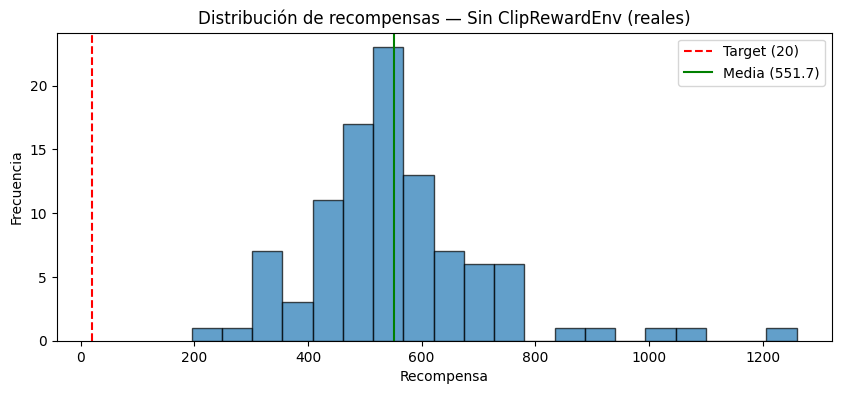

In [24]:
print("=" * 50)
print("EVALUACIÓN — Recompensas reales (100 episodios)")
print("=" * 50)
print(f"Media de recompensa: {np.mean(eval_rewards):.2f} ± {np.std(eval_rewards):.2f}")
print(f"Recompensa mínima:   {np.min(eval_rewards):.2f}")
print(f"Recompensa máxima:   {np.max(eval_rewards):.2f}")
print(f"Recompensa mediana:  {np.median(eval_rewards):.2f}")
print(f"Episodios > 20:      {sum(r > 20 for r in eval_rewards)}/100")
print("=" * 50)

plt.figure(figsize=(10, 4))
plt.hist(eval_rewards, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(x=20, color='r', linestyle='--', label='Target (20)')
plt.axvline(x=np.mean(eval_rewards), color='g', linestyle='-',
            label=f'Media ({np.mean(eval_rewards):.1f})')
plt.xlabel('Recompensa')
plt.ylabel('Frecuencia')
plt.title('Distribución de recompensas — Sin ClipRewardEnv (reales)')
plt.legend()
plt.savefig('evaluation_histogram_real.png')
plt.show()


### Evaluación con ClipRewardEnv (recompensas normalizadas)

Repetimos la evaluación activando `clip_reward=True` para comparar directamente con las recompensas que el agente vio durante el entrenamiento.

In [25]:
# --- Evaluación con recompensas clipeadas (igual que en entrenamiento) ---
eval_rewards_clipped = evaluate(agent, num_episodes=100, clip_reward=True)


Evaluating:   0%|          | 0/100 [00:00<?, ?it/s]

EVALUACIÓN — Recompensas clipeadas (100 episodios)
Media de recompensa: 31.01 ± 6.85
Recompensa mínima:   11.00
Recompensa máxima:   60.00
Recompensa mediana:  32.00
Episodios > 20:      97/100


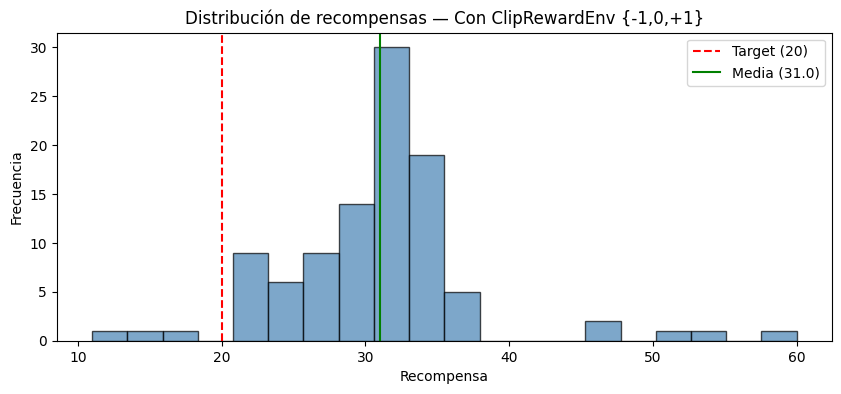

In [27]:
print("=" * 50)
print("EVALUACIÓN — Recompensas clipeadas (100 episodios)")
print("=" * 50)
print(f"Media de recompensa: {np.mean(eval_rewards_clipped):.2f} ± {np.std(eval_rewards_clipped):.2f}")
print(f"Recompensa mínima:   {np.min(eval_rewards_clipped):.2f}")
print(f"Recompensa máxima:   {np.max(eval_rewards_clipped):.2f}")
print(f"Recompensa mediana:  {np.median(eval_rewards_clipped):.2f}")
print(f"Episodios > 20:      {sum(r > 20 for r in eval_rewards_clipped)}/100")
print("=" * 50)

plt.figure(figsize=(10, 4))
plt.hist(eval_rewards_clipped, bins=20, edgecolor='black', alpha=0.7, color='steelblue')
plt.axvline(x=20, color='r', linestyle='--', label='Target (20)')
plt.axvline(x=np.mean(eval_rewards_clipped), color='g', linestyle='-',
            label=f'Media ({np.mean(eval_rewards_clipped):.1f})')
plt.xlabel('Recompensa')
plt.ylabel('Frecuencia')
plt.title('Distribución de recompensas — Con ClipRewardEnv {-1,0,+1}')
plt.legend()
plt.savefig('evaluation_histogram_clipped.png')
plt.show()


## Demo: Watch Agent Play

Grabamos y visualizamos un episodio completo del agente jugando Space Invaders.

In [28]:
def record_episode(agent, max_steps=5000):
    env = make_env(config.ENV_ID)
    frames = []
    state, _ = env.reset()
    total_reward = 0
    
    for _ in range(max_steps):
        # Store frame for visualization
        frames.append(state[0])  # Just first frame of stack
        
        # Select action (low epsilon for evaluation)
        action = agent.select_action(state, step=float('inf'))  # epsilon = min
        state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        
        if terminated or truncated:
            break
    
    env.close()
    return frames, total_reward

# Record one episode
frames, episode_reward = record_episode(agent)
print(f"Episode reward: {episode_reward}")

Episode reward: 26.0


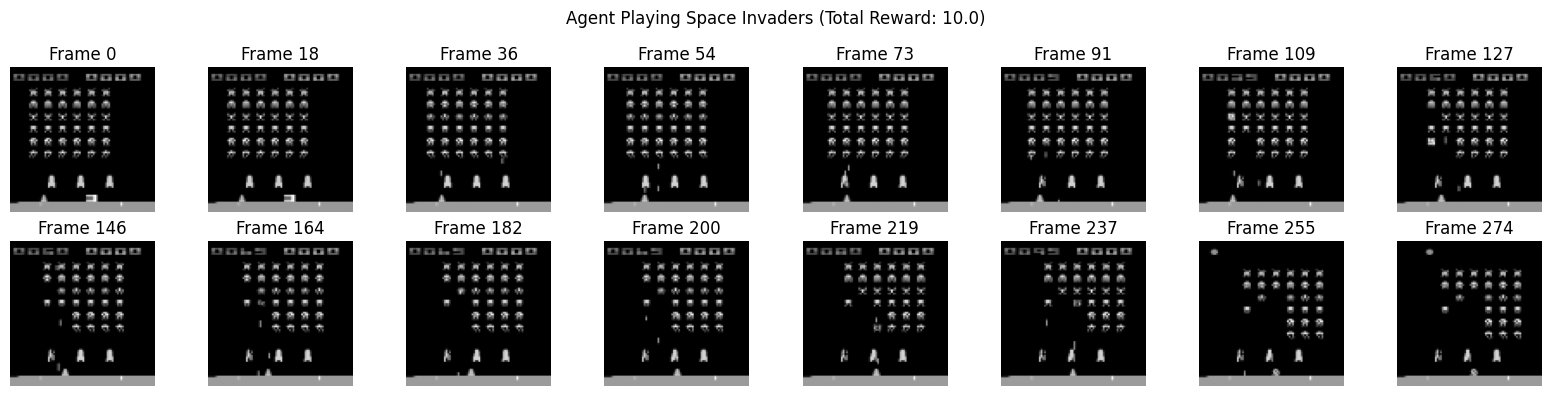

In [28]:
# Show sample frames from the episode
n_samples = min(16, len(frames))
indices = np.linspace(0, len(frames)-1, n_samples, dtype=int)

fig, axes = plt.subplots(2, 8, figsize=(16, 4))
for idx, ax in enumerate(axes.flat):
    if idx < n_samples:
        ax.imshow(frames[indices[idx]], cmap='gray')
        ax.set_title(f'Frame {indices[idx]}')
    ax.axis('off')
plt.suptitle(f'Agent Playing Space Invaders (Total Reward: {episode_reward})')
plt.tight_layout()
plt.savefig('agent_demo.png')
plt.show()

## Conclusiones y Justificación




### 3. Justificación de Hiperparámetros

#### 3.1 Parámetros de Entrenamiento

| Parámetro | Valor | Justificación |
|-----------|-------|---------------|
| `TOTAL_TIMESTEPS` | 5,000,000 | 5M es suficiente para convergencia inicial. |
| `LEARNING_RATE` | 2.5e-4 | Valor estándar para Adam en RL |
| `GAMMA` | 0.99 | Priorizamos recompensas a largo plazo |

**Sobre el Learning Rate (2.5e-4):**
- 2.5e-4 es el valor usado en implementaciones de referencia (Stable Baselines3)


#### 3.2 Parámetros de Exploración (ε-greedy)

| Parámetro | Valor | Justificación |
|-----------|-------|---------------|
| `EPSILON_START` | 1.0 | Exploración pura al inicio |
| `EPSILON_END` | 0.1 | 10% de exploración al final para evitar óptimos locales |
| `EPSILON_DECAY_STEPS` | 2,000,000 | Decaimiento lineal durante 40% del entrenamiento |

#### 3.3 Parámetros del Replay Buffer

| Parámetro | Valor | Justificación |
|-----------|-------|---------------|
| `BUFFER_SIZE` | 200,000 | reducido por limitaciones de memoria. Cubre miles de episodios |
| `BATCH_SIZE` | 32 | Estándar en DQN. Balance entre varianza del gradiente y eficiencia computacional |

**Optimización de memoria del buffer:**
- Los estados se almacenan como **uint8** [0,255] en lugar de float32, reduciendo el consumo de memoria 4x
- 200K transiciones ≈ 10.5GB de RAM

**Sobre el batch size:**
- Valor obtenido del estado del arte

#### 3.4 Parámetros de Sincronización de Redes

| Parámetro | Valor | Justificación |
|-----------|-------|---------------|
| `TARGET_UPDATE_FREQ` | 2,000 | Cada 2000 steps se copia Q-network → Target network |
| `LEARNING_STARTS` | 5,000 | No entrenar hasta tener suficientes muestras diversas |
| `TRAIN_FREQ` | 4 | Entrenar cada 4 steps del entorno |


### 7. Análisis de Rendimiento

#### 7.1 Resultados Obtenidos

El agente fue entrenado en **SpaceInvaders-v0** durante **5,000,000 timesteps** (16,598 episodios) en una **GPU T4 de Google Colab**.

**Evaluación con recompensas reales (sin ClipRewardEnv):**

| Métrica | Valor |
|---------|-------|
| **Media de recompensa (100 episodios eval)** | **551.70 ± 158.42** |
| **Episodios con recompensa > 20** | **100/100** |
| **Recompensa mínima** | 195.00 |
| **Recompensa máxima** | 1260.00 |
| **Mediana** | 542.50 |
| **Total de episodios entrenados** | 16,598 |

**Evaluación con recompensas clipeadas (con ClipRewardEnv):**

| Métrica | Valor |
|---------|-------|
| **Media de recompensa (100 episodios eval)** | **31.01 ± 6.85** |
| **Episodios con recompensa > 20** | **97/100** |
| **Recompensa mínima** | 11.00 |
| **Recompensa máxima** | 60.00 |
| **Mediana** | 32.00 |

### 8. Conclusión Final

- **Objetivo cumplido**: con recompensas reales se obtuvo una media de **551.70 puntos** con **100/100 episodios** por encima del umbral de 20 puntos. Incluso con recompensas clipeadas {-1, 0, +1} el agente supera el umbral en **97/100 episodios** con una media de **31.01**.
- Se implementó reward clipping con np.sign(reward) → {-1, 0, +1} **únicamente durante el entrenamiento**.
- Se usó Experience Replay con almacenamiento eficiente (uint8) para evitar que las muestras estén muy correlacionadas.
- Se añadió una Target Network para dar más estabilidad al entrenamiento.
- Se aplicó política ε-greedy para balancear exploración y explotación.
- Se utilizaron los wrappers estándar de Atari: NoOp, MaxAndSkip, WarpFrame, FrameStack y ClipReward (este último solo en entrenamiento).


---


### Desafíos Encontrados durante el desarrollo del proyecto

1. **Tiempo de entrenamiento**: El entrenamiento completo requiere varias horas
2. **Estabilidad**: Los Q-values pueden diverger sin gradient clipping

### Posibles Mejoras

1. **Double DQN**: Reduce sobreestimación de Q-values

### 9. Referencias

- Mnih, V., et al. (2015). *"Human-level control through deep reinforcement learning"*. **Nature**, 518(7540), 529-533. [Link](https://www.nature.com/articles/nature14236)
- Mnih, V., et al. (2013). *"Playing Atari with Deep Reinforcement Learning"*. NIPS Deep Learning Workshop. [Link](https://arxiv.org/abs/1312.5602)


**Implementaciones de Referencia:**
- OpenAI Baselines: https://github.com/openai/baselines
- Stable Baselines3: https://github.com/DLR-RM/stable-baselines3
- CleanRL: https://github.com/vwxyzjn/cleanrl